Coefficients (ordre décroissant) : [ 0.33333333 -1.13333333  1.91666667  0.08333333  1.        ]
P(x) = 0.333333x^4 - 1.133333x^3 + 1.916667x^2 + 0.083333x + 1.000000


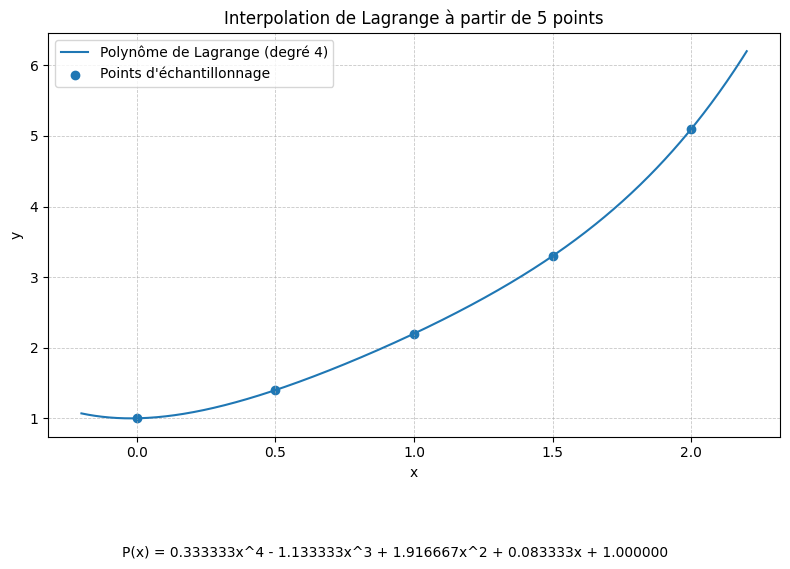

In [1]:
# -*- coding: utf-8 -*-
# Interpolation de Lagrange : affichage du polynôme + tracé matplotlib

import numpy as np
import matplotlib.pyplot as plt
import textwrap

def lagrange_poly(x, y):
    """
    Construit le polynôme d'interpolation de Lagrange sous forme numpy.poly1d.
    x, y : itérables de mêmes longueurs, avec abscisses x toutes distinctes.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    n = len(x)
    if len(y) != n:
        raise ValueError("x et y doivent avoir la même longueur.")
    if len(np.unique(x)) != n:
        raise ValueError("Les abscisses x doivent être distinctes.")

    P = np.poly1d([0.0])  # polynôme nul
    for j in range(n):
        Lj = np.poly1d([1.0])
        denom = 1.0
        for m in range(n):
            if m != j:
                Lj = np.polymul(Lj, np.poly1d([1.0, -x[m]]))  # (x - x_m)
                denom *= (x[j] - x[m])
        P = np.polyadd(P, y[j] * (Lj / denom))
    return P

def format_poly(poly, var="x", decimals=6, zero_tol=1e-12):
    """
    Formate joliment un numpy.poly1d, en supprimant les coefficients ~0.
    Retourne une chaîne du type : 0.123456x^4 - 1.234567x^3 + ...
    """
    coeffs = np.array(poly.c, dtype=float)
    coeffs[np.abs(coeffs) < zero_tol] = 0.0

    terms = []
    deg = len(coeffs) - 1
    for i, a in enumerate(coeffs):
        p = deg - i
        if abs(a) < zero_tol:
            continue
        sign = "-" if a < 0 else "+"
        val = abs(a)
        if p == 0:
            monom = f"{val:.{decimals}f}"
        elif p == 1:
            monom = f"{val:.{decimals}f}{var}" if not np.isclose(val, 1.0, atol=zero_tol) else f"{var}"
        else:
            monom = f"{val:.{decimals}f}{var}^{p}" if not np.isclose(val, 1.0, atol=zero_tol) else f"{var}^{p}"
        if not terms:
            monom = monom if sign == "+" else f"-{monom}"
        else:
            monom = f" {sign} {monom}"
        terms.append(monom)
    return "".join(terms) if terms else "0"

if __name__ == "__main__":
    # === 1) RENSEIGNE ICI TES 5 POINTS (x_i, y_i) ===
    x_pts = [0.0, 0.5, 1.0, 1.5, 2.0]
    y_pts = [1.0, 1.4, 2.2, 3.3, 5.1]

    # === 2) Construction du polynôme de Lagrange ===
    P = lagrange_poly(x_pts, y_pts)

    # Affichage console
    print("Coefficients (ordre décroissant) :", P.c)
    pretty = "P(x) = " + format_poly(P, var="x", decimals=6)
    print(pretty)

    # === 3) Tracé Matplotlib ===
    x_arr = np.array(x_pts, dtype=float)
    xmin, xmax = x_arr.min(), x_arr.max()
    pad = 0.1 * (xmax - xmin if xmax > xmin else 1.0)
    x_plot = np.linspace(xmin - pad, xmax + pad, 600)
    y_plot = P(x_plot)

    plt.figure(figsize=(8, 5))
    plt.plot(x_plot, y_plot, label=f"Polynôme de Lagrange (degré {len(x_pts)-1})")
    plt.scatter(x_pts, y_pts, marker="o", label="Points d'échantillonnage")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Interpolation de Lagrange à partir de 5 points")
    plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
    plt.legend()

    # Ajoute l'expression de P(x) sous le graphique 
    wrapped = "\n".join(textwrap.wrap(pretty, width=80))
    plt.gcf().text(0.5, -0.1, wrapped, ha="center", va="top")

    plt.tight_layout()
    plt.savefig("lagrange_plot.png", bbox_inches="tight", dpi=160)
    plt.show()
